In [2]:
pip install tf_keras ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 65.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 71.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 41.4 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316931 sha256=f725a35ba36cd7b35b1a3ebb41465ed6bf7c077653ac4eeb7ccf345c911a00de
  Stored in directory: /root/.cache/pip/wheels/9d/4f/dc/c0938352fb567d086fc05479342d6cf5d562c5c94f4c601774
  Created wheel for keras_bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33500

In [1]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import ktrain
from ktrain import text

In [5]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['labels', 'text'])

In [6]:
df

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.2, random_state=0)

In [8]:
data_train.shape

(4457, 2)

In [9]:
data_test.shape

(1115, 2)

In [10]:
(x_train, y_train),(x_test, y_test), preproc = text.texts_from_df(
    train_df=data_train, text_column = 'text',
    label_columns = 'labels',
    val_df = data_test,
    preprocess_mode = 'bert')   # or distilbert

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [11]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
model = text.text_classifier(name='bert', train_data=(x_train, y_train),
                             preproc=preproc)

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.12/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [13]:
type(model)

tf_keras.src.engine.functional.Functional

In [14]:
learner = ktrain.get_learner(model=model, train_data=(x_train, y_train),
                            val_data = (x_test, y_test), batch_size = 6)

In [15]:
learner

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
743/743 [==============================] - 474s 587ms/step - loss: 0.2615 - accuracy: 0.8730
Epoch 2/2
743/743 [==============================] - 153s 205ms/step - loss: 1.1530 - accuracy: 0.7981


/usr/local/lib/python3.12/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(




done.
Visually inspect loss plot and select learning rate associated with falling loss


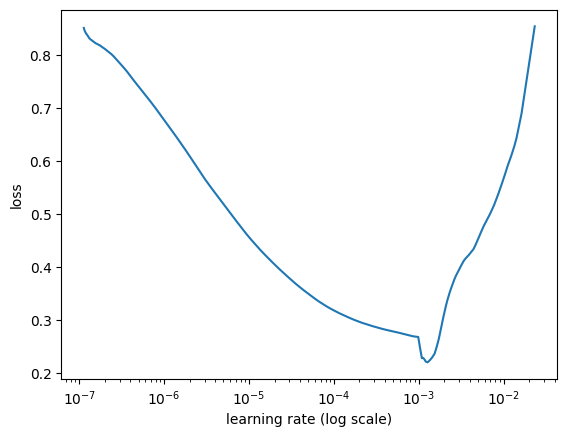

In [16]:
learner.lr_find(show_plot=True, max_epochs=2)

In [20]:
predictor = ktrain.get_predictor(learner.model, preproc=preproc)

In [21]:
sent = 'You won bonus prize of 10000. Cal us to claim.'

In [22]:
predictor.predict(sent)

'spam'